%run feature_engineering.ipynb

In [23]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import TimeSeriesSplit
import pandas as pd
import matplotlib as plt
import numpy as np
from sklearn.metrics import mean_squared_error


In [24]:
%run feature_engineering.ipynb

In [25]:
prediction_time=prediction_time
df_hospital = df_hospital
df_portobello = df_portobello
df_hospital.set_index("TIME",inplace=True,drop=True)
df_portobello.set_index("TIME",inplace=True,drop=True)


In [26]:
def get_X_and_y(df:pd.DataFrame):
    y=df["AVAILABLE BIKES"]
    X = df.drop(axis=1,columns=["BIKE STANDS","AVAILABLE BIKES"])
    return X,y

In [27]:
X_portobello,y_portobello=get_X_and_y(df_portobello)
X_hospital,y_hospital=get_X_and_y(df_hospital)
X_hospital

,DAY OF WEEK,HOUR,MINUTE,10MIN,20MIN,30MIN,1DAY,2DAY,3DAY,1WEEK
TIME,,,,,,,,,,
2020-02-04 00:00:02,0.000000,0.0,0.000000,0.100,0.075,0.075,0.275,0.625,0.850,0.5
2020-02-04 00:05:02,0.000000,0.0,0.087719,0.100,0.075,0.075,0.275,0.625,0.875,0.5
2020-02-04 00:10:02,0.000000,0.0,0.175439,0.100,0.100,0.075,0.275,0.625,0.875,0.5
2020-02-04 00:15:02,0.000000,0.0,0.263158,0.100,0.100,0.075,0.275,0.650,0.875,0.5
2020-02-04 00:20:02,0.000000,0.0,0.350877,0.100,0.100,0.100,0.275,0.650,0.875,0.5
...,...,...,...,...,...,...,...,...,...,...
2020-03-12 23:35:02,0.333333,1.0,0.614035,0.575,0.575,0.575,0.225,0.500,0.450,0.7
2020-03-12 23:40:02,0.333333,1.0,0.701754,0.575,0.575,0.575,0.225,0.500,0.450,0.7
2020-03-12 23:45:02,0.333333,1.0,0.789474,0.575,0.575,0.575,0.250,0.500,0.450,0.7


In [28]:
ridge_model_portobello = Ridge()
ridge_model_portobello.fit(X_portobello,y_portobello)

ridge_model_hospital = Ridge()
ridge_model_hospital.fit(X_hospital,y_hospital)

Ridge()

In [29]:
df=pd.DataFrame({"Feature Name":ridge_model_hospital.feature_names_in_,
"Hospital":ridge_model_hospital.coef_,
"Portobello":ridge_model_portobello.coef_})
df.set_index("Feature Name",inplace=True)

df

,Hospital,Portobello
Feature Name,,
DAY OF WEEK,-0.019416,-0.023726
HOUR,0.022975,0.057426
MINUTE,0.003457,-0.002845
10MIN,0.990058,0.838276
20MIN,-0.089607,-0.122865
30MIN,-0.021690,0.068136
1DAY,0.065358,0.051052
2DAY,0.006644,0.030766
3DAY,0.021128,0.025769


Text(0, 0.5, 'Linear Model Coefficient')

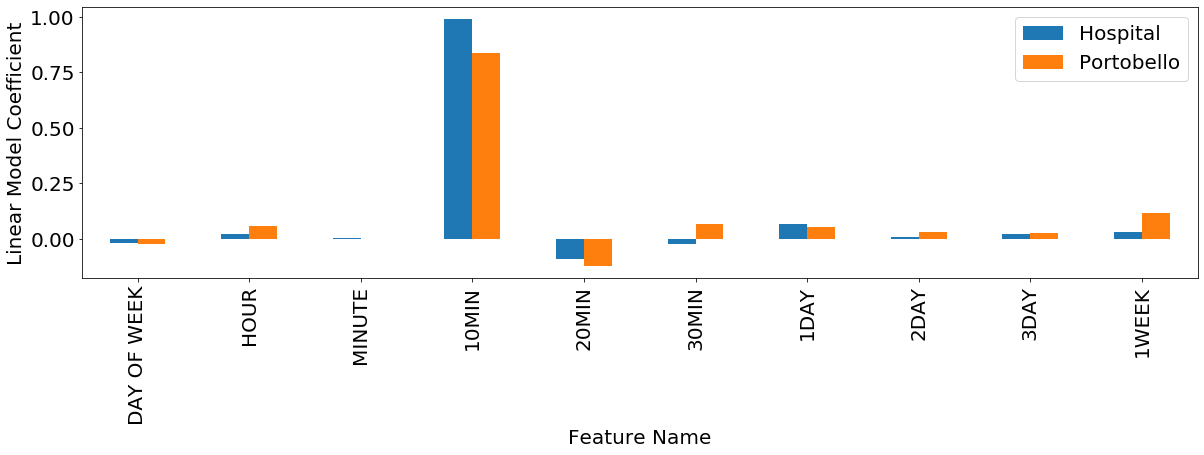

In [30]:
plt.rc('font',size=20)
df.plot.bar(figsize=(20,5))
plt.ylabel("Linear Model Coefficient")


In [31]:
def test_and_plot_model(model,df :pd.DataFrame, X, y, title:str):
    cv = TimeSeriesSplit(n_splits=5)
    mse_scores=[]
    split_count=0
    X = X.to_numpy()
    y = y.to_numpy()
    for train, test in cv.split(X):
        model.fit(X[train], y[train])
        ypred = model.predict(X[test])
        mse_scores.append(mean_squared_error(y[test], ypred))
        split_count=split_count+1
        if split_count == 5:
            plt.rc('font',size=30)
            plt.figure(figsize=(30,20))
            plt.scatter(df.iloc[test].index,y[test],label="actual",marker='o')
            plt.scatter(df.iloc[test].index,ypred,label="predicted")
            plt.xlim(df.iloc[test].index[0],df.iloc[test].index[-1])
            plt.legend()
            plt.xlabel("Time")
            plt.ylabel("Available Bikes")
            

    print("MSE: "+str(np.mean(mse_scores)))
    plt.title(title+" MSE: "+str(np.mean(mse_scores)))

In [32]:
X_hospital

,DAY OF WEEK,HOUR,MINUTE,10MIN,20MIN,30MIN,1DAY,2DAY,3DAY,1WEEK
TIME,,,,,,,,,,
2020-02-04 00:00:02,0.000000,0.0,0.000000,0.100,0.075,0.075,0.275,0.625,0.850,0.5
2020-02-04 00:05:02,0.000000,0.0,0.087719,0.100,0.075,0.075,0.275,0.625,0.875,0.5
2020-02-04 00:10:02,0.000000,0.0,0.175439,0.100,0.100,0.075,0.275,0.625,0.875,0.5
2020-02-04 00:15:02,0.000000,0.0,0.263158,0.100,0.100,0.075,0.275,0.650,0.875,0.5
2020-02-04 00:20:02,0.000000,0.0,0.350877,0.100,0.100,0.100,0.275,0.650,0.875,0.5
...,...,...,...,...,...,...,...,...,...,...
2020-03-12 23:35:02,0.333333,1.0,0.614035,0.575,0.575,0.575,0.225,0.500,0.450,0.7
2020-03-12 23:40:02,0.333333,1.0,0.701754,0.575,0.575,0.575,0.225,0.500,0.450,0.7
2020-03-12 23:45:02,0.333333,1.0,0.789474,0.575,0.575,0.575,0.250,0.500,0.450,0.7


MSE: 0.0168711634235962
MSE: 0.01010301638850378


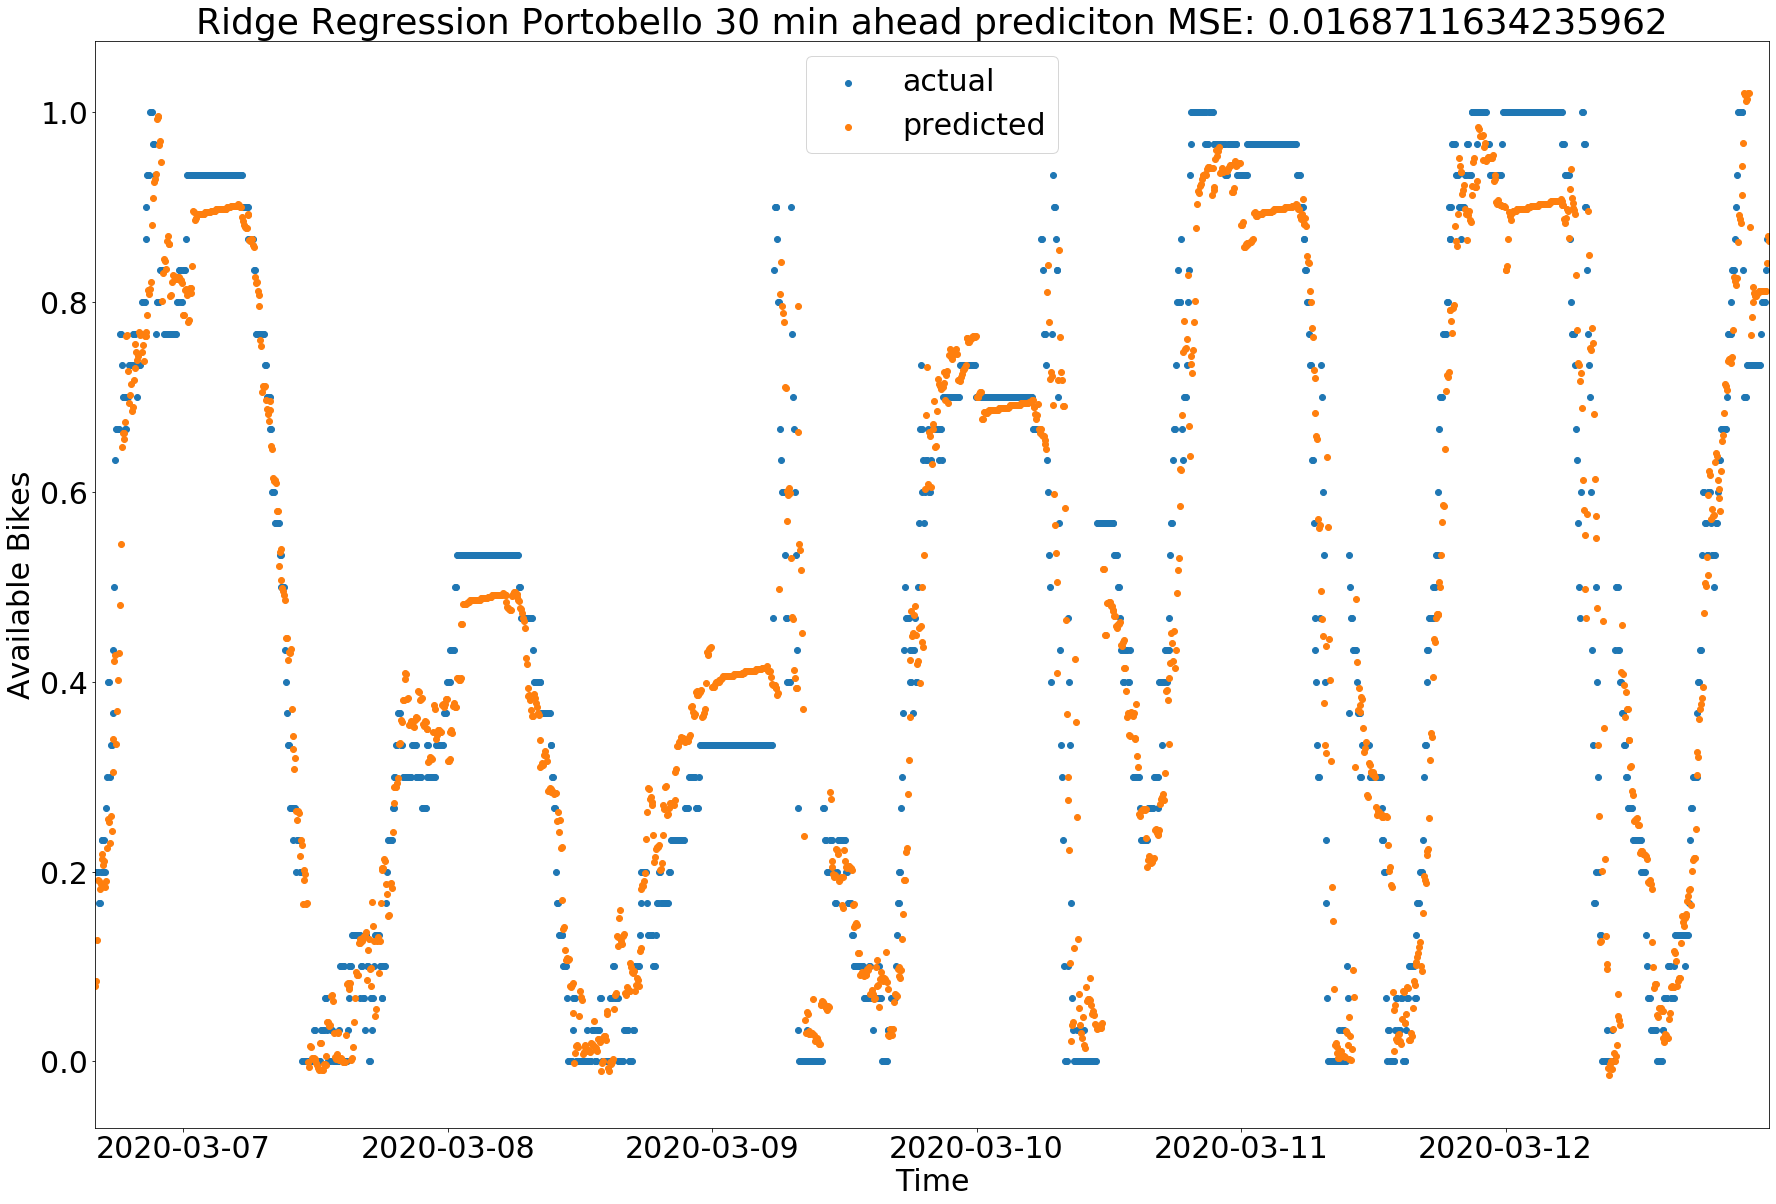

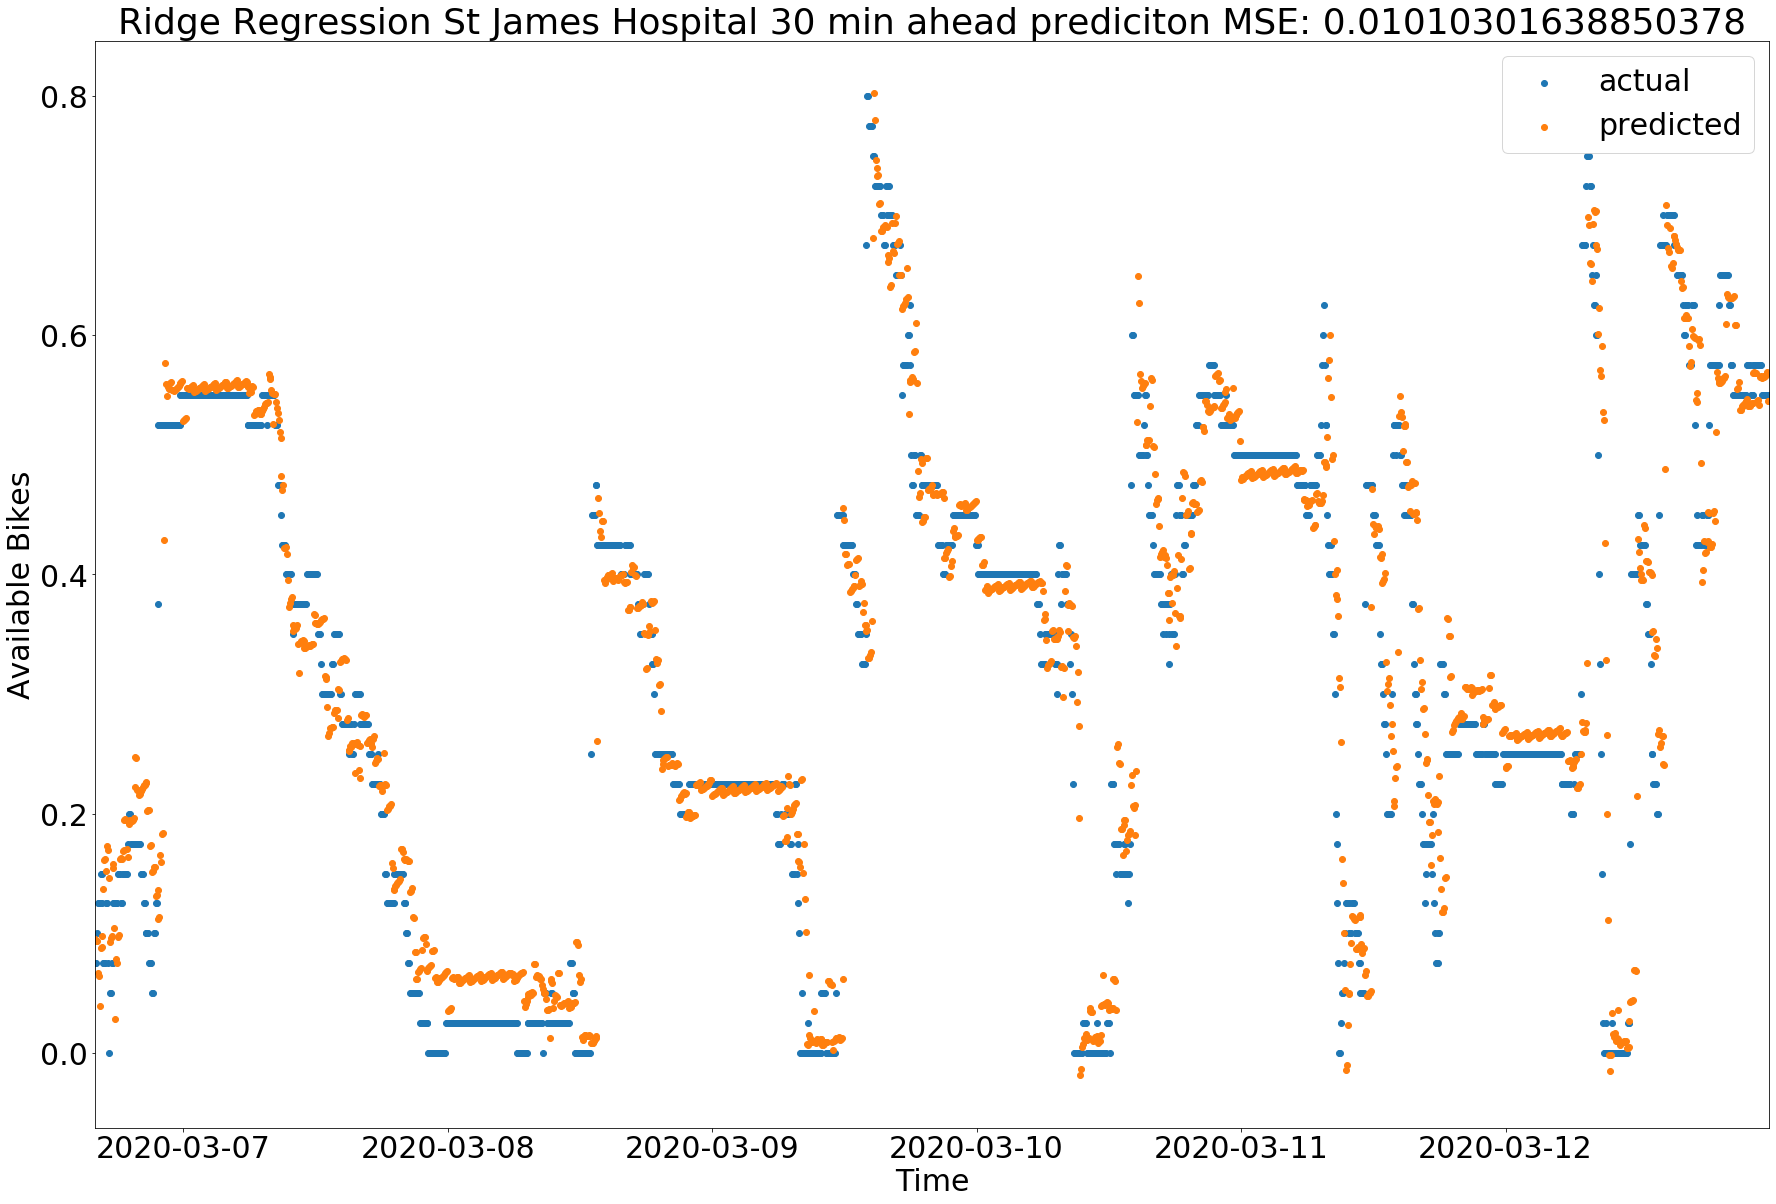

In [33]:

test_and_plot_model(Ridge(),df_portobello,X_portobello,y_portobello,"Ridge Regression Portobello "+str(prediction_time)+" min ahead prediciton")
test_and_plot_model(Ridge(),df_hospital,X_hospital,y_hospital,"Ridge Regression St James Hospital "+str(prediction_time)+" min ahead prediciton")